# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate? 

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [2]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

**Challenge**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li> 
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

In [4]:
# shape of the datasets
print(
    f'Tesla shape: {df_tesla.shape}\nBitcoin shape: {df_btc_search.shape}\nBitcoin Price shape: {df_btc_price.shape}\nDf unemployment shape: {df_unemployment.shape}')

Tesla shape: (124, 3)
Bitcoin shape: (73, 2)
Bitcoin Price shape: (2204, 3)
Df unemployment shape: (181, 3)


In [5]:
# number of rows
print(
    f'Tesla rows: {df_tesla.shape[0]}\nBitcoin rows: {df_btc_search.shape[0]}\nBitcoin Price rows: {df_btc_price.shape[0]}\nDf unemployment rows: {df_unemployment.shape[0]}')

Tesla rows: 124
Bitcoin rows: 73
Bitcoin Price rows: 2204
Df unemployment rows: 181


In [6]:
# number of columns
print(
    f'Tesla columns: {df_tesla.shape[1]}\nBitcoin columns: {df_btc_search.shape[1]}\nBitcoin Price columns: {df_btc_price.shape[1]}\nDf unemployment columns: {df_unemployment.shape[1]}')

Tesla columns: 3
Bitcoin columns: 2
Bitcoin Price columns: 3
Df unemployment columns: 3


In [7]:
# column names
print(
    f'Tesla column names: {df_tesla.columns}\nBitcoin column names: {df_btc_search.columns}\nBitcoin Price column names: {df_btc_price.columns}\nDf unemployment column names: {df_unemployment.columns}')

Tesla column names: Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')
Bitcoin column names: Index(['MONTH', 'BTC_NEWS_SEARCH'], dtype='object')
Bitcoin Price column names: Index(['DATE', 'CLOSE', 'VOLUME'], dtype='object')
Df unemployment column names: Index(['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE'], dtype='object')


In [8]:
df_tesla

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766000
1,2010-07-01,3,3.988000
2,2010-08-01,2,3.896000
3,2010-09-01,2,4.082000
4,2010-10-01,2,4.368000
...,...,...,...
119,2020-05-01,16,167.000000
120,2020-06-01,17,215.962006
121,2020-07-01,24,286.152008
122,2020-08-01,23,498.320007


In [9]:
print(f'Largest value for Tesla in Web Search: {df_tesla['TSLA_WEB_SEARCH'].max()}')
print(f'Smallest value for Tesla in Web Search: {df_tesla['TSLA_WEB_SEARCH'].min()}')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


In [10]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


### Unemployment Data

In [11]:
df_unemployment

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6
...,...,...,...
176,2018-09,14,3.7
177,2018-10,15,3.8
178,2018-11,16,3.7
179,2018-12,17,3.9


In [12]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {df_unemployment['UE_BENEFITS_WEB_SEARCH'].max()}')

Largest value for "Unemployemnt Benefits" in Web Search: 100


### Bitcoin

In [13]:
df_btc_search

,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5
...,...,...
68,2020-05,22
69,2020-06,13
70,2020-07,14
71,2020-08,16


In [14]:
print(f'largest BTC News Search: {df_btc_search['BTC_NEWS_SEARCH'].max()}')

largest BTC News Search: 100


# Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [31]:
print(f'Missing values for Tesla?\n{df_tesla.isna().values.any()}')
print()
print(f'Missing values for U/E?\n{df_unemployment.isna().values.any()}')
print()
print(f'Missing values for BTC Search?\n{df_btc_search.isna().values.any()} ')
print()
print(f'Missing values for BTC Price?\n{df_btc_price.isna().values.any()} ')

Missing values for Tesla?
False

Missing values for U/E?
False

Missing values for BTC Search?
False 

Missing values for BTC Price?
True 


In [35]:
print(f'Missing values for BTC price?\n{df_btc_price.isnull().sum()}')

Missing values for BTC price?
DATE      0
CLOSE     1
VOLUME    1
dtype: int64


In [36]:
print(f'Number of missing values: {df_btc_price.isnull().sum().sum()}')

Number of missing values: 2


**Challenge**: Remove any missing values that you found. 

In [39]:
df_btc_price.dropna(inplace=True)

### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

In [40]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MONTH            124 non-null    object 
 1   TSLA_WEB_SEARCH  124 non-null    int64  
 2   TSLA_USD_CLOSE   124 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.0+ KB


In [49]:
# convert 'MONTH' column to datetime

df_tesla['MONTH'] = pd.to_datetime(df_tesla['MONTH'])

In [54]:
df_unemployment['MONTH'] = pd.to_datetime(df_unemployment['MONTH'])

In [57]:
df_btc_price['DATE'] = pd.to_datetime(df_btc_price['DATE'])

In [59]:
df_btc_search['MONTH'] = pd.to_datetime(df_btc_search['MONTH'])

### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In [66]:
df_btc_monthly = df_btc_price.resample('ME', on='DATE').last()

In [67]:
df_btc_monthly

,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,3.470730e+07
2014-10-31,338.321014,1.254540e+07
2014-11-30,378.046997,9.194440e+06
2014-12-31,320.192993,1.394290e+07
2015-01-31,217.464005,2.334820e+07
...,...,...
2020-05-31,9461.058594,2.777329e+10
2020-06-30,9137.993164,1.573580e+10
2020-07-31,11323.466797,2.316047e+10


# Data Visualisation

### Notebook Formatting & Style Helpers

In [22]:
# Create locators for ticks on the time axis

In [21]:
# Register date converters to avoid warning messages

In [74]:
df_tesla

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE,year,month,day
0,2010-06-01,3,4.766000,2010,6,1
1,2010-07-01,3,3.988000,2010,7,1
2,2010-08-01,2,3.896000,2010,8,1
3,2010-09-01,2,4.082000,2010,9,1
4,2010-10-01,2,4.368000,2010,10,1
...,...,...,...,...,...,...
119,2020-05-01,16,167.000000,2020,5,1
120,2020-06-01,17,215.962006,2020,6,1
121,2020-07-01,24,286.152008,2020,7,1
122,2020-08-01,23,498.320007,2020,8,1


### Tesla Stock Price v.s. Search Volume

**Challenge:** Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'. 

Text(0, 0.5, 'Search Trend')

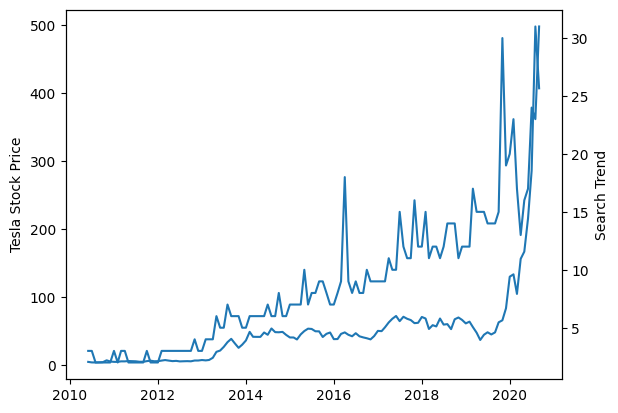

In [85]:
x = df_tesla['MONTH']  # x-axis
y = df_tesla['TSLA_USD_CLOSE']  # y1-axis
y1 = df_tesla['TSLA_WEB_SEARCH']  # y2-axis

fig, ax1 = plt.subplots()

# first axis
ax1.plot(x, y)
ax1.set_ylabel('Tesla Stock Price')

ax2 = ax1.twinx()
ax2.plot(x, y1)
ax2.set_ylabel('Search Trend')

**Challenge**: Add colours to style the chart. This will help differentiate the two lines and the axis labels. Try using one of the blue [colour names](https://matplotlib.org/3.1.1/gallery/color/named_colors.html) for the search volume and a HEX code for a red colour for the stock price. 
<br>
<br>
Hint: you can colour both the [axis labels](https://matplotlib.org/3.3.2/api/text_api.html#matplotlib.text.Text) and the [lines](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) on the chart using keyword arguments (kwargs).  

Text(0, 0.5, 'Search Trend')

<Figure size 1400x800 with 0 Axes>

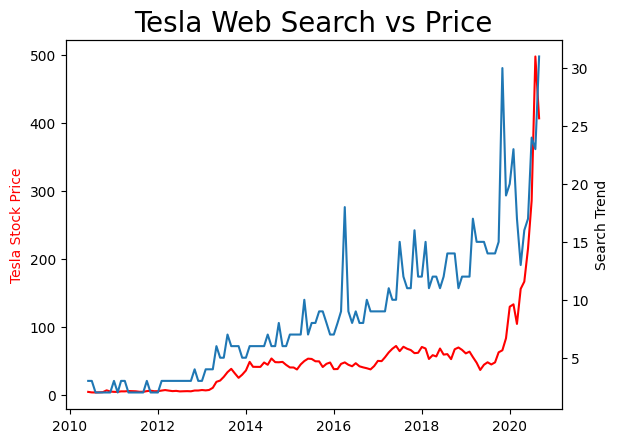

In [95]:
plt.figure(figsize=(14, 8))
x = df_tesla['MONTH']  # x-axis
y = df_tesla['TSLA_USD_CLOSE']  # y1-axis
y1 = df_tesla['TSLA_WEB_SEARCH']  # y2-axis

fig, ax1 = plt.subplots()
plt.title('Tesla Web Search vs Price', fontsize=20)
# first axis
ax1.plot(x, y, 'r')
ax1.set_ylabel('Tesla Stock Price', color='r')

ax2 = ax1.twinx()
ax2.plot(x, y1)
ax2.set_ylabel('Search Trend')

How to add tick formatting for dates on the x-axis.

### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

In [99]:
df_btc_search['BTC_NEWS_SEARCH'].value_counts()

BTC_NEWS_SEARCH
5      8
4      8
3      7
14     6
6      6
15     6
18     3
26     3
16     3
13     3
22     2
21     2
17     2
19     2
25     2
12     1
8      1
50     1
100    1
62     1
52     1
30     1
9      1
20     1
23     1
Name: count, dtype: int64

In [101]:
df_btc_price

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,2.105680e+07
1,2014-09-18,424.440002,3.448320e+07
2,2014-09-19,394.795990,3.791970e+07
3,2014-09-20,408.903992,3.686360e+07
4,2014-09-21,398.821014,2.658010e+07
...,...,...,...
2199,2020-09-24,10745.548828,2.301754e+10
2200,2020-09-25,10702.290039,2.123255e+10
2201,2020-09-26,10754.437500,1.810501e+10
2202,2020-09-27,10774.426758,1.801688e+10


### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate.
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br>
5. Can you discern any seasonality in the searches? Is there a pattern?

In [120]:
df_unemployment

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01-01,34,5.7
1,2004-02-01,33,5.6
2,2004-03-01,25,5.8
3,2004-04-01,29,5.6
4,2004-05-01,23,5.6
...,...,...,...
176,2018-09-01,14,3.7
177,2018-10-01,15,3.8
178,2018-11-01,16,3.7
179,2018-12-01,17,3.9


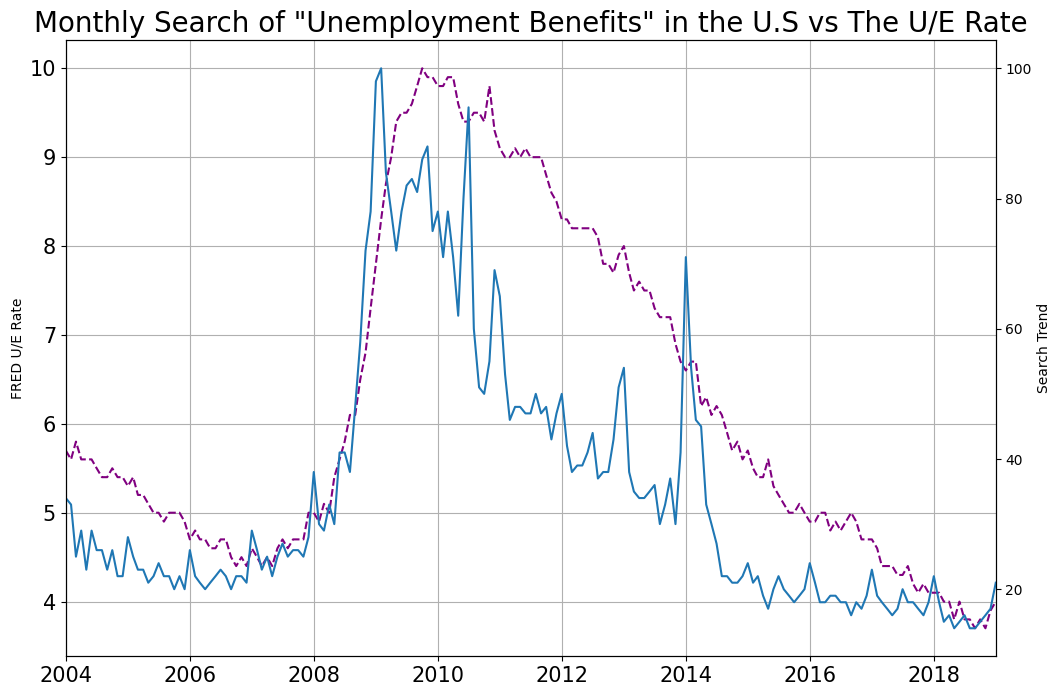

In [139]:
plt.figure(figsize=(12, 8))
plt.title('Monthly Search of "Unemployment Benefits" in the U.S vs The U/E Rate', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_xlim(df_unemployment['MONTH'].min(), df_unemployment['MONTH'].max())
ax1.set_ylabel('FRED U/E Rate')
ax1.plot(df_unemployment['MONTH'], df_unemployment['UNRATE'], color='purple', linestyle='dashed')

ax2.set_ylabel('Search Trend')
ax2.plot(df_unemployment['MONTH'], df_unemployment['UE_BENEFITS_WEB_SEARCH'])
ax1.grid(True)

### Including 2020 in Unemployment Charts

**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?

In [141]:
df_benefits_2020 = pd.read_csv('UE Benefits Search vs UE Rate 2004-20.csv')

df_benefits_2020

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,9,5.7
1,2004-02,8,5.6
2,2004-03,7,5.8
3,2004-04,8,5.6
4,2004-05,6,5.6
...,...,...,...
195,2020-04,100,14.7
196,2020-05,63,13.3
197,2020-06,53,11.1
198,2020-07,54,10.2


In [145]:
df_benefits_2020['MONTH'] = pd.to_datetime(df_benefits_2020['MONTH'])

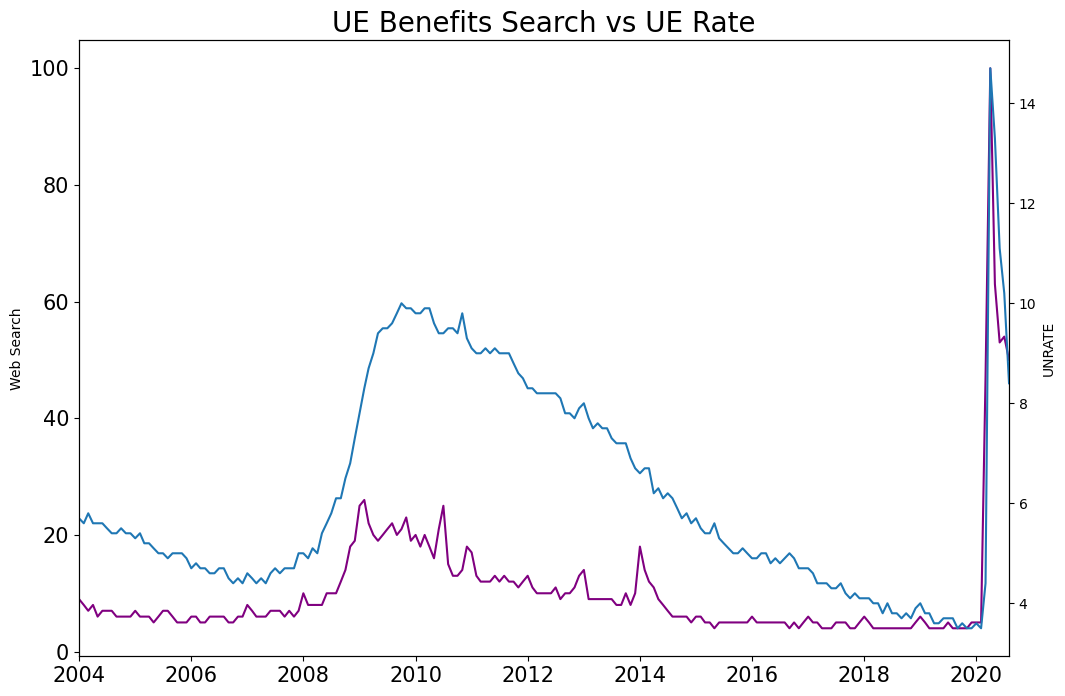

In [156]:
plt.figure(figsize=(12, 8))
plt.title('UE Benefits Search vs UE Rate', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

ax1 = plt.gca()
ax1.set_ylabel('Web Search')
ax1.set_xlim(df_benefits_2020['MONTH'].min(), df_benefits_2020['MONTH'].max())

ax2 = ax1.twinx()
ax2.set_ylabel('UNRATE')

ax1.plot(df_benefits_2020['MONTH'], df_benefits_2020['UE_BENEFITS_WEB_SEARCH'], color='purple')
ax2.plot(df_benefits_2020['MONTH'], df_benefits_2020['UNRATE'])